In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-dev20200315
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 1.0.3
sklearn 0.22.2.post1
tensorflow 2.2.0-dev20200315
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint  # 打印格式好看点

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7) # test_size=0.25(默认)，可以通过                                   
                                                # 这个改变比例
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)
print(x_train.shape[1:])

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)
(8,)


In [5]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [15]:
# 子类api实现deep&wide模型
class WideDeepModule(keras.models.Model):
    def __init__(self):
        super(WideDeepModule, self).__init__()
        # 定义模型层次
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        #完成模型的正向运算
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input , hidden2])
        output = self.output_layer(concat)
        return output
# 方式1
# model = WideDeepModule()

# 方式2
model = keras.models.Sequential([
    WideDeepModule()
])


model.build(input_shape=(None, 8)) # None对应样本数 8对应输入的feature数
    
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=15, min_delta=1e-2)]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_module_3 (WideDeep multiple                  1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_train_scaled, y_train),
                   epochs=100,
                   callbacks = callbacks)
# 程序自己停止的原因是patiense时间到了，loss没变化自己停下

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
290/363 [======================>.......] - ETA: 0s - loss: 1.2202WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F736595B70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output

D:\Tools\Anaconda\Anaconda3\envs\py36_tensorflow2.0_gpu\lib\site-packages\tensorflow\python\keras\callbacks.py:1472: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 12/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 13/100
363/363 [==============================] - 0s 

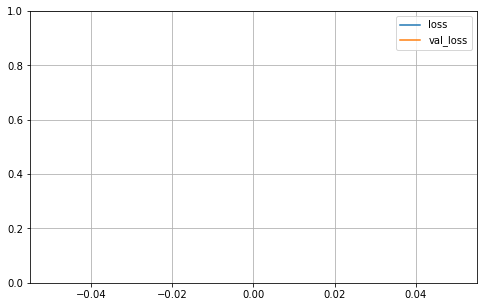

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled, y_test)